In [56]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
titanic = pd.read_csv("titanic.csv")

In [4]:
len(titanic.index) # total number of passengers

891

## Data wrangling

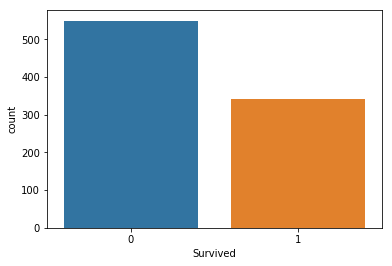

In [5]:
sns.countplot(x="Survived", data=titanic) 
# this tells the total number of people survived is less than no. of people that did not survived

In [6]:
titanic[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


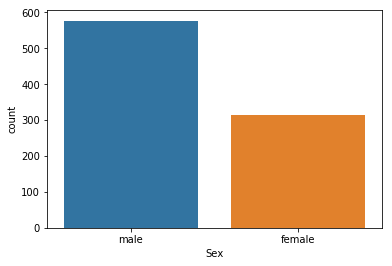

In [7]:
sns.countplot(x="Sex", data=titanic)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
titanic.isnull() # convert the data in boolean format and where the value is null it is showing True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
titanic.isnull().sum()
# shows the sum or the number of values that are null, i.e. True

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### now to apply the logistic regression, we need to predict that whether the person survived or not?
### so, here "Survived" coloumn is our dependent variable or the one we need to predict

In [12]:
titanic.drop("Cabin", axis=1, inplace=True)

In [13]:
titanic[:7] # here we can see we dropped the column cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


In [14]:
# To drop the NaN values
titanic.dropna(inplace=True) # here this inplace, returns nothing and directly change the original value

In [15]:
titanic.isnull().sum()
# this tells us that our data is now cleaned

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Now in order to apply logistic regression we need to convert the string values to categorical variable

In [16]:
sex = pd.get_dummies(titanic["Sex"], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
# now we'll drop other useless columns as well
cols_to_drop = ["PassengerId", "Name", "Ticket", "Fare", "Embarked"]

In [18]:
titanic = titanic.drop(cols_to_drop, axis=1)

In [19]:
pcl = pd.get_dummies(titanic["Pclass"], drop_first= True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [20]:
titanic = pd.concat((titanic,sex,pcl), axis=1)

In [21]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,male,2,3
0,0,3,male,22.0,1,0,1,0,1
1,1,1,female,38.0,1,0,0,0,0
2,1,3,female,26.0,0,0,0,0,1
3,1,1,female,35.0,1,0,0,0,0
4,0,3,male,35.0,0,0,1,0,1


### now that we have added the dummy variables for sex and pclas we can simply drop these columns as well

In [22]:
titanic.drop(["Pclass","Sex"],axis=1, inplace=True)

In [54]:
titanic.head()

,Survived,Age,SibSp,Parch,male,2,3
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,0
4,0,35.0,0,0,1,0,1


In [55]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
Survived    712 non-null int64
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
male        712 non-null uint8
2           712 non-null uint8
3           712 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 29.9 KB


### Train and Test Data

In [24]:
X = titanic.drop("Survived", axis=1)
Y = titanic["Survived"]

In [25]:
X[:5]

,Age,SibSp,Parch,male,2,3
0,22.0,1,0,1,0,1
1,38.0,1,0,0,0,0
2,26.0,0,0,0,0,1
3,35.0,1,0,0,0,0
4,35.0,0,0,1,0,1


In [26]:
Y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.00, random_state=42)

In [28]:
X_train.shape

(712, 6)

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train,Y_train)

c:\users\naman grover\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
test = pd.read_csv("test.csv")

In [32]:
test[:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False


In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
test.shape

(418, 11)

In [38]:
test.drop("Cabin",axis=1,inplace=True)

In [39]:
#test.dropna(inplace=True)

In [40]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [41]:
test.shape

(418, 10)

In [42]:
sex = pd.get_dummies(test["Sex"], drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [43]:
PassID = test["PassengerId"]

In [44]:
PassID

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [45]:
cols_to_drop = ["PassengerId", "Name", "Ticket", "Fare", "Embarked"]

In [46]:
test = test.drop(cols_to_drop, axis=1)

In [47]:
pcl = pd.get_dummies(test["Pclass"], drop_first= True)
pcl.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [48]:
test = pd.concat((test,sex,pcl), axis=1)

In [49]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,male,2,3
0,3,male,34.5,0,0,1,0,1
1,3,female,47.0,1,0,0,0,1
2,2,male,62.0,0,0,1,1,0
3,3,male,27.0,0,0,1,0,1
4,3,female,22.0,1,1,0,0,1


In [50]:
test.drop(["Pclass","Sex"],axis=1, inplace=True)

In [51]:
test.head()

,Age,SibSp,Parch,male,2,3
0,34.5,0,0,1,0,1
1,47.0,1,0,0,0,1
2,62.0,0,0,1,1,0
3,27.0,0,0,1,0,1
4,22.0,1,1,0,0,1


In [52]:
test.shape

(418, 6)

In [53]:
test.isnull().sum()

Age      86
SibSp     0
Parch     0
male      0
2         0
3         0
dtype: int64

In [455]:
test = test.fillna(0)

In [456]:
print(test)

      Age  SibSp  Parch  male  2  3
0    34.5      0      0     1  0  1
1    47.0      1      0     0  0  1
2    62.0      0      0     1  1  0
3    27.0      0      0     1  0  1
4    22.0      1      1     0  0  1
5    14.0      0      0     1  0  1
6    30.0      0      0     0  0  1
7    26.0      1      1     1  1  0
8    18.0      0      0     0  0  1
9    21.0      2      0     1  0  1
10    0.0      0      0     1  0  1
11   46.0      0      0     1  0  0
12   23.0      1      0     0  0  0
13   63.0      1      0     1  1  0
14   47.0      1      0     0  0  0
15   24.0      1      0     0  1  0
16   35.0      0      0     1  1  0
17   21.0      0      0     1  0  1
18   27.0      1      0     0  0  1
19   45.0      0      0     0  0  1
20   55.0      1      0     1  0  0
21    9.0      0      1     1  0  1
22    0.0      0      0     0  0  0
23   21.0      0      1     1  0  0
24   48.0      1      3     0  0  0
25   50.0      1      0     1  0  1
26   22.0      0      1     

In [457]:
test.fillna(test["Age"].mean(),inplace=True)

In [458]:
test.shape

(418, 6)

In [459]:
prediction = model.predict(test)

In [460]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [461]:
dframe = pd.DataFrame(prediction,PassID)

In [462]:
dframe.to_csv("Submission.csv",)

In [463]:
pd.read_csv("Submission.csv")

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [464]:
dframe = dframe.rename(columns={0: "Survived"},)

In [465]:
dframe

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [466]:
dframe.to_csv("Submission.csv")

In [467]:
pd.read_csv("Submission.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
